In [1]:
import pandas as pd
house=pd.read_csv('/content/house_price.csv')

In [2]:
house

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1.0,2012.92,32.0,84.88,10.0,24.98,121.54,37.9
1,2.0,2012.92,19.5,306.59,9.0,24.98,121.54,42.2
2,3.0,2013.58,13.3,561.98,5.0,24.99,121.54,47.3
3,4.0,2013.50,13.3,561.98,5.0,24.99,121.54,54.8
4,5.0,2012.83,5.0,390.57,5.0,24.98,121.54,43.1
...,...,...,...,...,...,...,...,...
409,410.0,2013.00,13.7,4082.02,0.0,24.94,121.50,15.4
410,411.0,2012.67,5.6,90.46,9.0,24.97,121.54,50.0
411,412.0,2013.25,18.8,390.97,7.0,24.98,121.54,40.6
412,413.0,2013.00,8.1,104.81,5.0,24.97,121.54,52.5


In [3]:
x=house.iloc[:,1:7].values
x

array([[2012.92,   32.  ,   84.88,   10.  ,   24.98,  121.54],
       [2012.92,   19.5 ,  306.59,    9.  ,   24.98,  121.54],
       [2013.58,   13.3 ,  561.98,    5.  ,   24.99,  121.54],
       ...,
       [2013.25,   18.8 ,  390.97,    7.  ,   24.98,  121.54],
       [2013.  ,    8.1 ,  104.81,    5.  ,   24.97,  121.54],
       [2013.5 ,    6.5 ,   90.46,    9.  ,   24.97,  121.54]])

In [4]:
y=house.iloc[:,7].values
y

array([ 37.9,  42.2,  47.3,  54.8,  43.1,  32.1,  40.3,  46.7,  18.8,
        22.1,  41.4,  58.1,  39.3,  23.8,  34.3,  50.5,  70.1,  37.4,
        42.3,  47.7,  29.3,  51.6,  24.6,  47.9,  38.8,  27. ,  56.2,
        33.6,  47. ,  57.1,  22.1,  25. ,  34.2,  49.3,  55.1,  27.3,
        22.9,  25.3,  47.7,  46.2,  15.9,  18.2,  34.7,  34.1,  53.9,
        38.3,  42. ,  61.5,  13.4,  13.2,  44.2,  20.7,  27. ,  38.9,
        51.7,  13.7,  41.9,  53.5,  22.6,  42.4,  21.3,  63.2,  27.7,
        55. ,  25.3,  44.3,  50.7,  56.8,  36.2,  42. ,  59. ,  40.8,
        36.3,  20. ,  54.4,  29.5,  36.8,  25.6,  29.8,  26.5,  40.3,
        36.8,  48.1,  17.7,  43.7,  50.8,  27. ,  18.3,  48. ,  25.3,
        45.4,  43.2,  21.8,  16.1,  41. ,  51.8,  59.5,  34.6,  51. ,
        62.2,  38.2,  32.9,  54.4,  45.7,  30.5,  71. ,  47.1,  26.6,
        34.1,  28.4,  51.6,  39.4,  23.1,   7.6,  53.3,  46.4,  12.2,
        13. ,  30.6,  59.6,  31.3,  48. ,  32.5,  45.5,  57.4,  48.6,
        62.9,  55. ,

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [6]:
#Standard scalar
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x_train=st.fit_transform(x_train)
x_test=st.transform(x_test)

In [7]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [8]:
y_pred=regressor.predict(x_test)

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.44074545])

In [10]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [11]:
y_pred=regressor.predict(x_test)

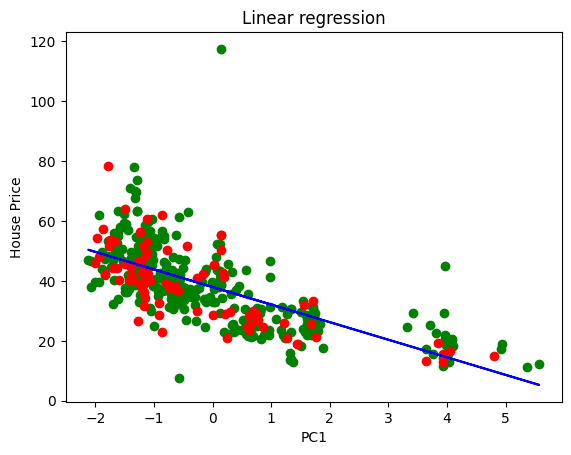

In [12]:
import matplotlib.pyplot as plt
plt.scatter(x_train,y_train,color='green')
plt.scatter(x_test,y_test,color='red')
plt.plot(x_train,regressor.predict(x_train),color='blue')
plt.title('Linear regression')
plt.xlabel('PC1')
plt.ylabel('House Price')
plt.show()

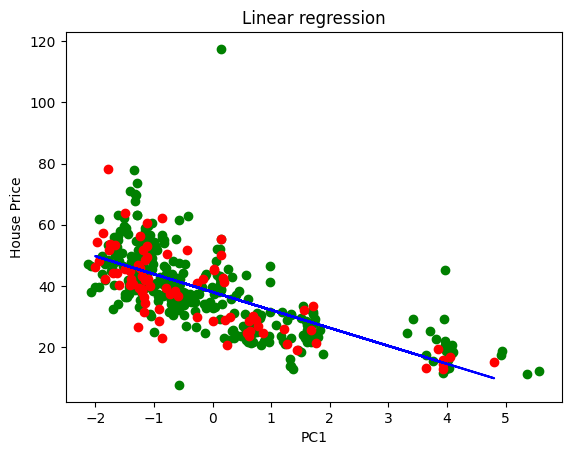

In [13]:
import matplotlib.pyplot as plt
plt.scatter(x_train,y_train,color='green')
plt.scatter(x_test,y_test,color='red')
plt.plot(x_test,regressor.predict(x_test),color='blue')
plt.title('Linear regression')
plt.xlabel('PC1')
plt.ylabel('House Price')
plt.show()